In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Model + Data Loading

In [2]:
import pprint

import pandas as pd
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from pathlib import Path

from language_structure import *
from train import load, load_dataloader
from model import *
from utils import *
from bert import tokenization

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vocab_file = './uncased_L-12_H-768_A-12/vocab.txt'
tokenizer = tokenization.FullTokenizer(vocab_file=vocab_file, do_lower_case=True)
pp = pprint.PrettyPrinter(indent=4)
ID = "JUNE27"

Total Time: 871.5755 
Train Time: 377.4861
Max (Validation, Train): (0.44, 0.55)


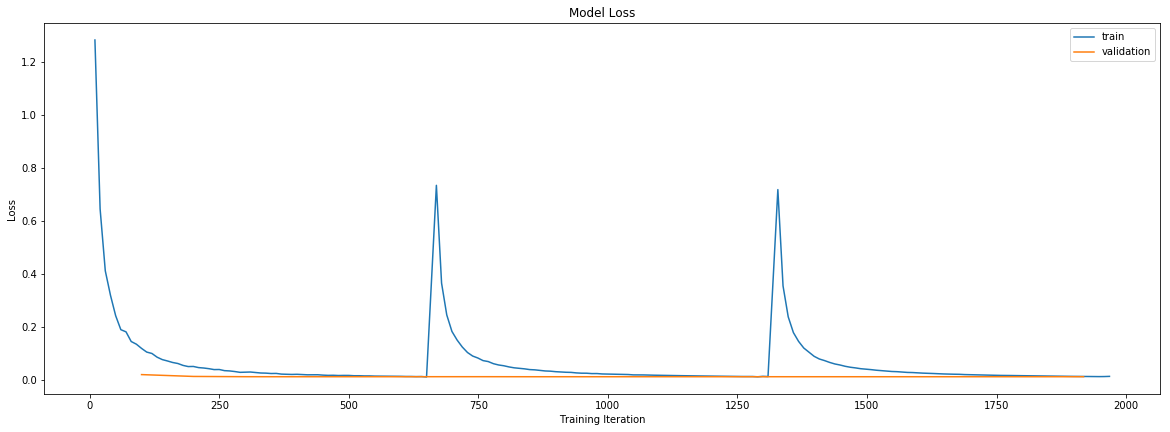

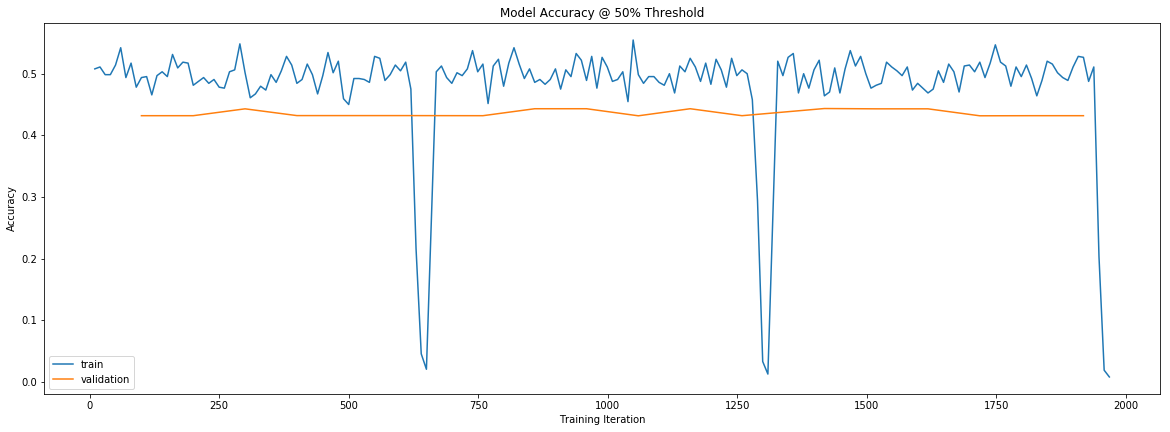

{   '--COLA': False,
    '--IMDB': False,
    '--QNLI': True,
    '--QQP': False,
    '--RTE': False,
    '--attention-dropout': False,
    '--batch-size': '64',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.5',
    '--dset-size': '40000',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '3',
    '--max-sent-len': '512',
    '--n-heads': '6',
    '--n-layers': '6',
    '--n-valid': '6000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Vanilla Dropout',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '100'}


In [6]:
model_path = 'complete_QNLI-VD-{}'.format(ID)
model1, _, _, m1 = load(model_path, cpu=True, load_model=False)
m1['args']['--save-to'] = 'Vanilla Dropout'
plot_metrics(m1, first_n=None)
pp.pprint(m1['args'])

Total Time: 1052.9469 
Train Time: 546.3555
Max (Validation, Train): (0.51, 0.69)


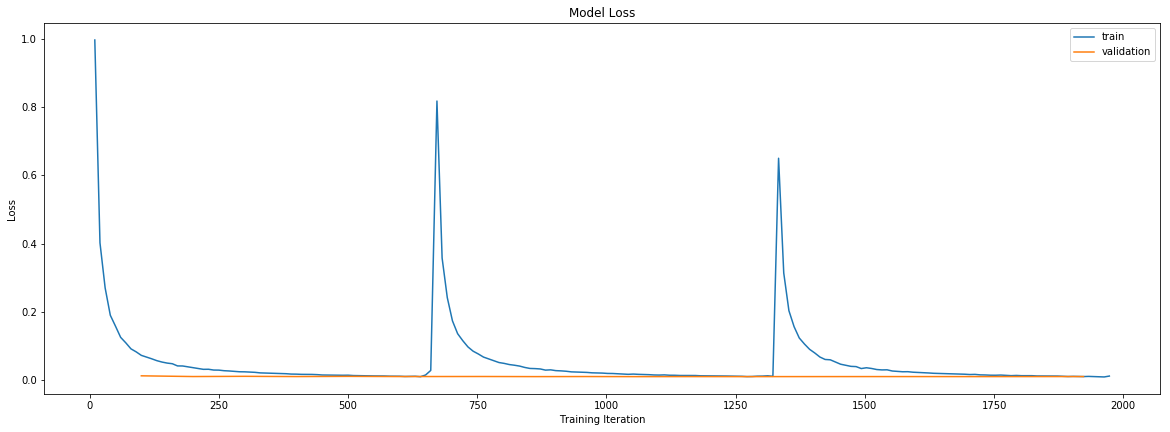

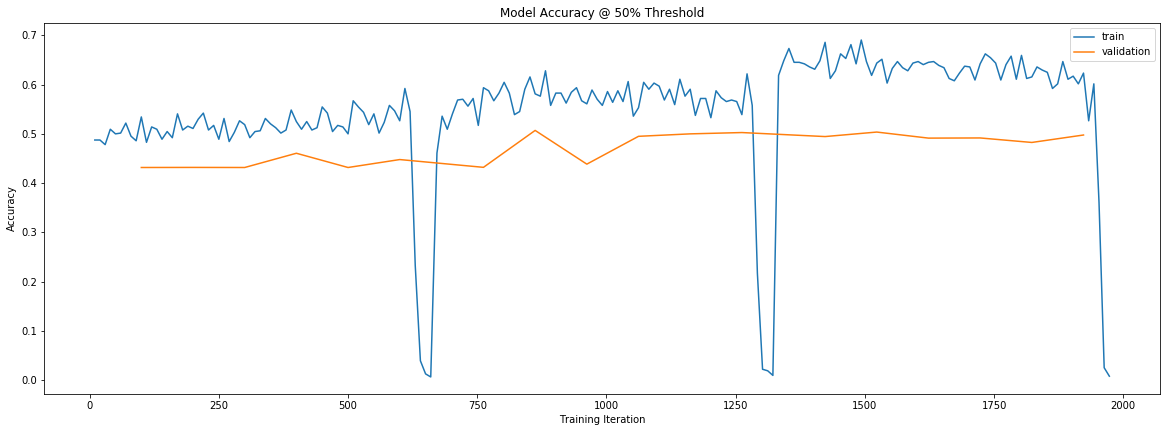

{   '--COLA': False,
    '--IMDB': False,
    '--QNLI': True,
    '--QQP': False,
    '--RTE': False,
    '--attention-dropout': True,
    '--batch-size': '64',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.5',
    '--dset-size': '40000',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '3',
    '--max-sent-len': '512',
    '--n-heads': '6',
    '--n-layers': '6',
    '--n-valid': '6000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Attention-Dropout (Ours)',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '100'}


In [7]:
model_path = 'complete_QNLI-AD-{}'.format(ID)
model2, _, _, m2 = load(model_path, cpu=True, load_model=False)
m2['args']['--save-to'] = 'Attention-Dropout (Ours)'
plot_metrics(m2, first_n=None)
pp.pprint(m2['args'])

--------Vanilla Dropout----------
Max (Validation, Train): (0.44, 0.55)
Total Time: 871.5755 
Train Time: 377.4861
--------Attention-Dropout (Ours)----------
Max (Validation, Train): (0.51, 0.69)
Total Time: 1052.9469 
Train Time: 546.3555


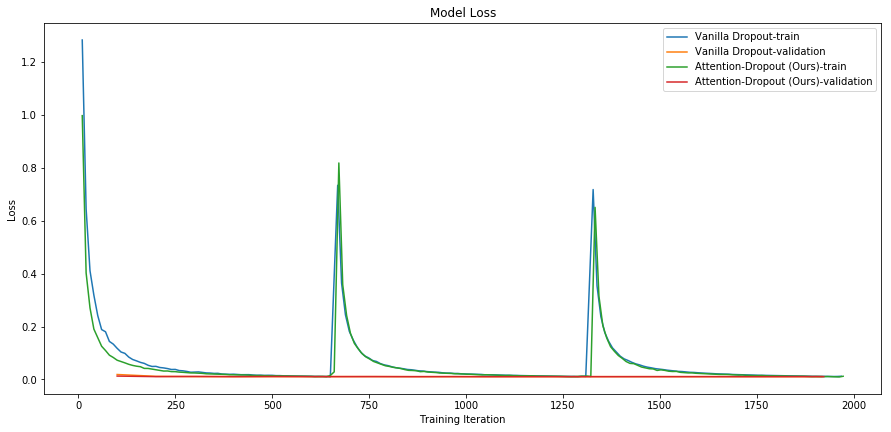

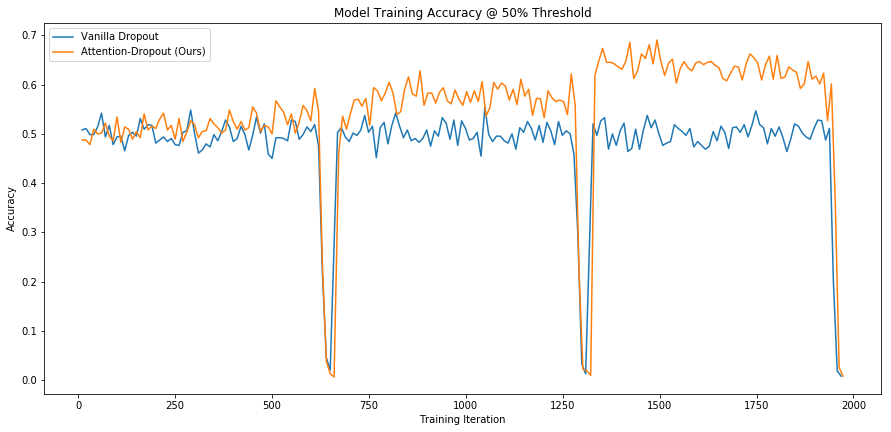

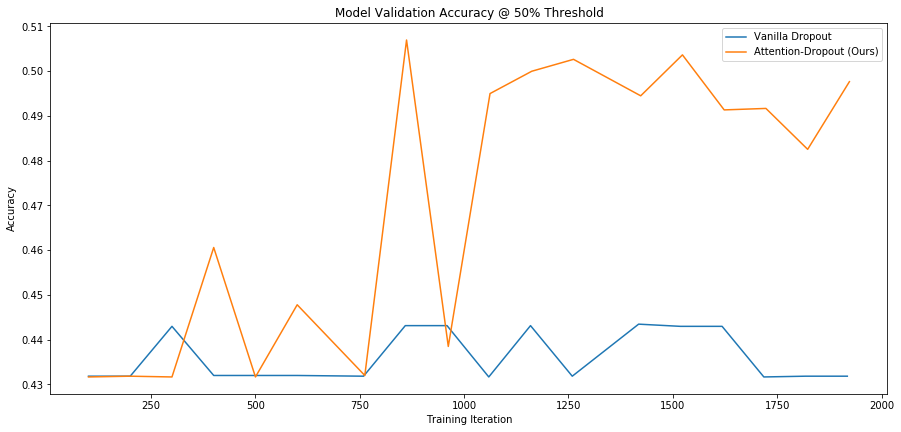

In [8]:
compare_metrics([m1, m2], first_n=None)

# QNLI

Total Time: 437.1881 
Train Time: 208.2953
Max (Validation, Train): (0.52, 0.60)


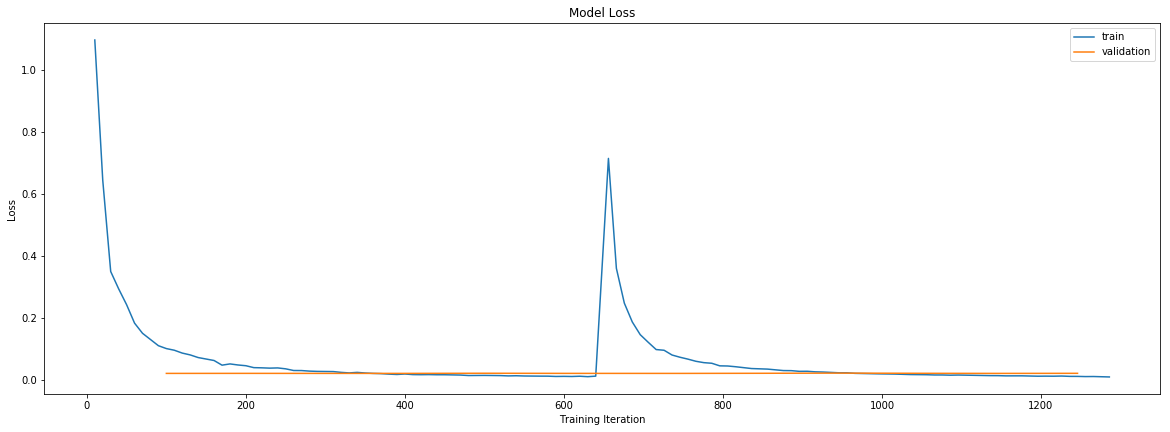

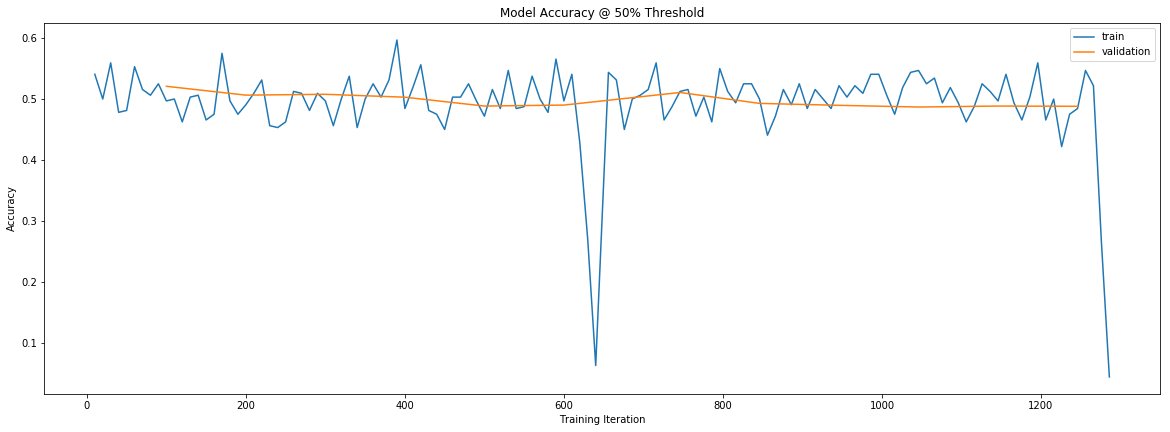

{   '--COLA': False,
    '--IMDB': False,
    '--QNLI': True,
    '--QQP': False,
    '--RTE': False,
    '--attention-dropout': False,
    '--batch-size': '32',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.4',
    '--dset-size': '20000',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '2',
    '--max-sent-len': '512',
    '--n-heads': '6',
    '--n-layers': '6',
    '--n-valid': '5000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Vanilla Dropout',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '100'}


In [3]:
model_path = 'complete_QNLI-VD-{}'.format(ID)
model1, _, _, m1 = load(model_path, cpu=True, load_model=False)
m1['args']['--save-to'] = 'Vanilla Dropout'
plot_metrics(m1, first_n=None)
pp.pprint(m1['args'])

Total Time: 514.2579 
Train Time: 283.7184
Max (Validation, Train): (0.55, 0.65)


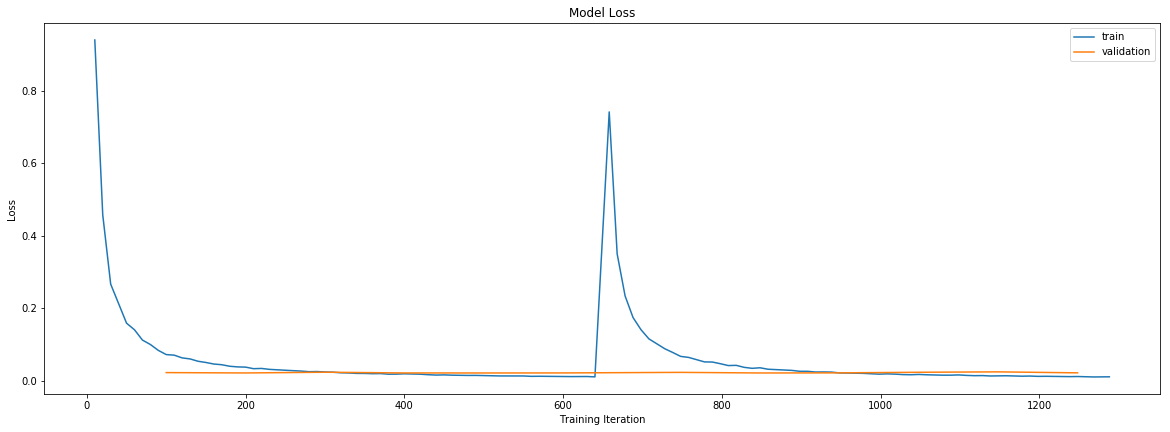

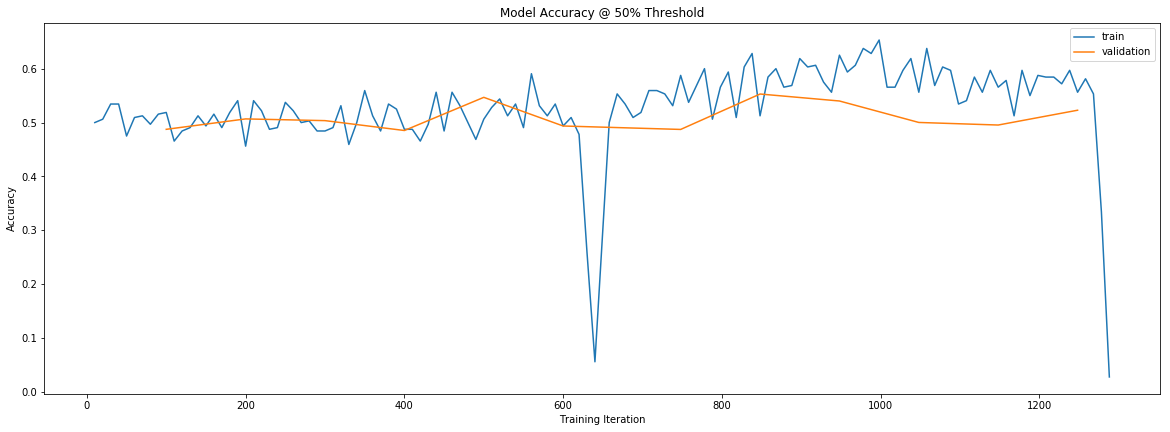

{   '--COLA': False,
    '--IMDB': False,
    '--QNLI': True,
    '--QQP': False,
    '--RTE': False,
    '--attention-dropout': True,
    '--batch-size': '32',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.4',
    '--dset-size': '20000',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '2',
    '--max-sent-len': '512',
    '--n-heads': '6',
    '--n-layers': '6',
    '--n-valid': '5000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Attention-Dropout (Ours)',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '100'}


In [4]:
model_path = 'complete_QNLI-AD-{}'.format(ID)
model2, _, _, m2 = load(model_path, cpu=True, load_model=False)
m2['args']['--save-to'] = 'Attention-Dropout (Ours)'
plot_metrics(m2, first_n=None)
pp.pprint(m2['args'])

--------Vanilla Dropout----------
Max (Validation, Train): (0.52, 0.60)
Total Time: 437.1881 
Train Time: 208.2953
--------Attention-Dropout (Ours)----------
Max (Validation, Train): (0.55, 0.65)
Total Time: 514.2579 
Train Time: 283.7184


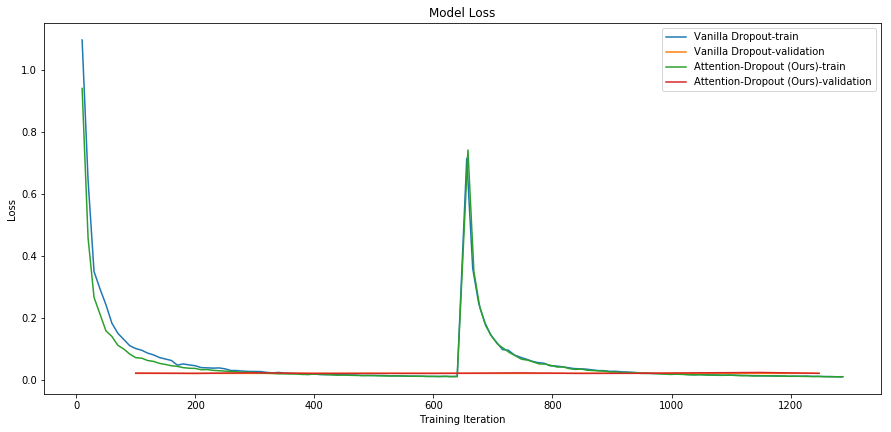

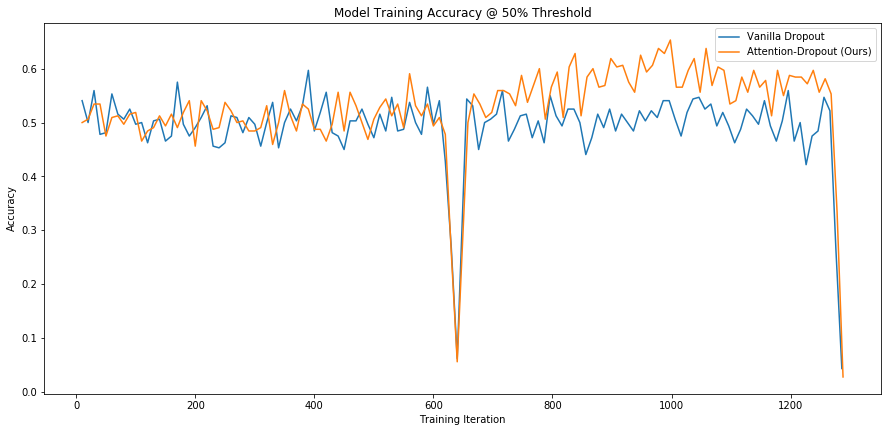

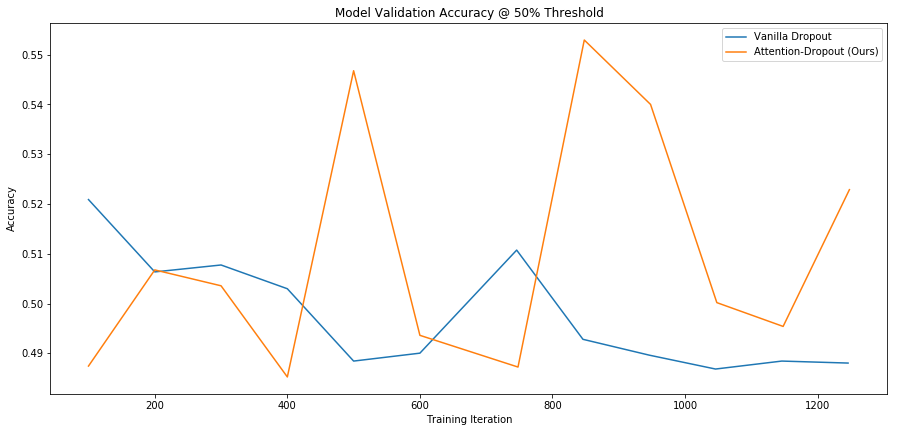

In [5]:
compare_metrics([m1, m2], first_n=None)

# QQP

# 12 Layer

Total Time: 1096.4026 
Train Time: 521.432
Max (Validation, Train): (0.71, 0.89)


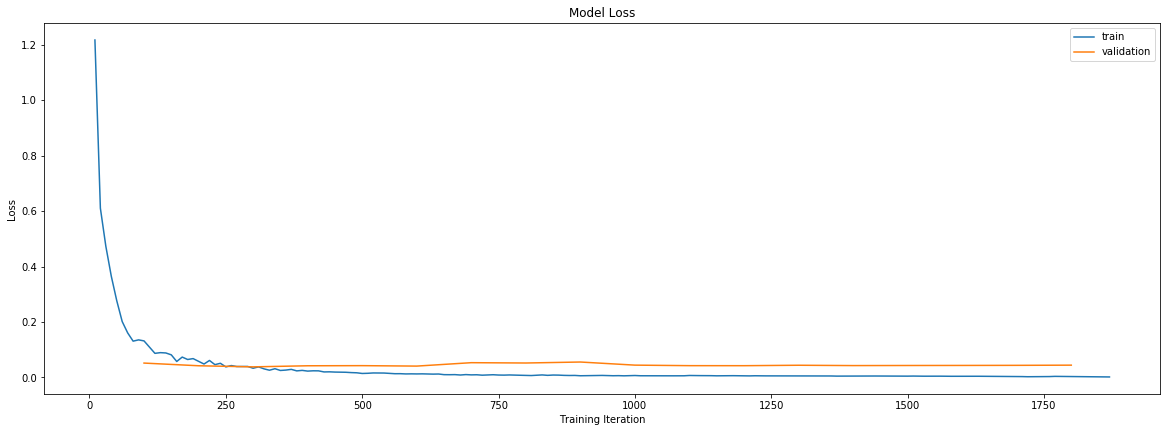

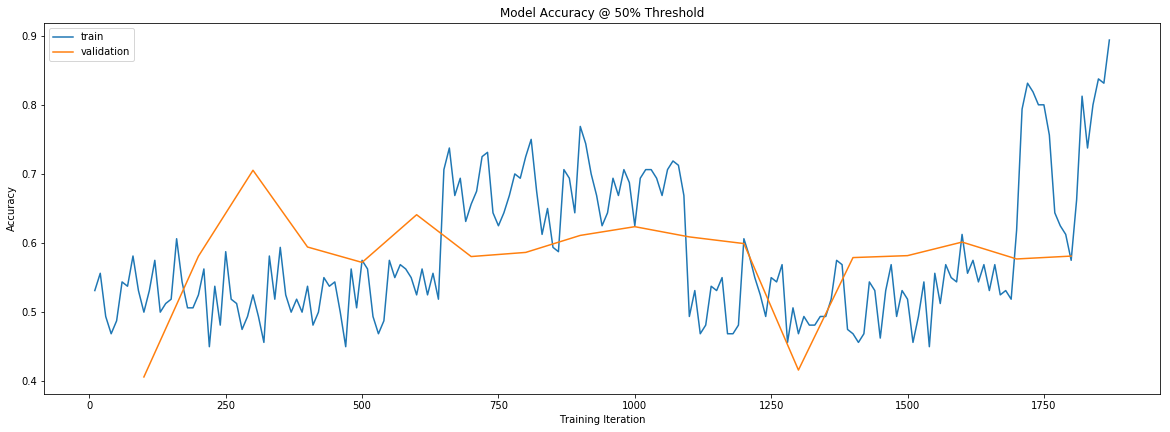

{   '--COLA': False,
    '--IMDB': False,
    '--QNLI': False,
    '--QQP': True,
    '--RTE': False,
    '--attention-dropout': False,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.5',
    '--dset-size': '30000',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '1',
    '--max-sent-len': '512',
    '--n-heads': '12',
    '--n-layers': '12',
    '--n-valid': '6000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Vanilla Dropout',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '100'}


In [3]:
model_path = 'complete_QQP-VD-12LAYER-{}'.format(ID)
model1, _, _, m1 = load(model_path, cpu=True, load_model=False)
m1['args']['--save-to'] = 'Vanilla Dropout'
plot_metrics(m1, first_n=None)
pp.pprint(m1['args'])

Total Time: 1286.7591 
Train Time: 696.5877
Max (Validation, Train): (0.84, 0.89)


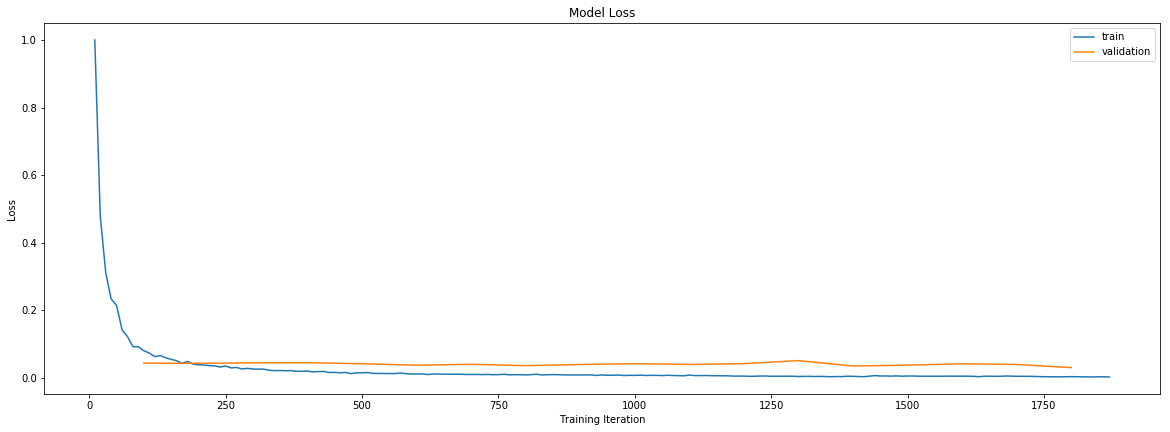

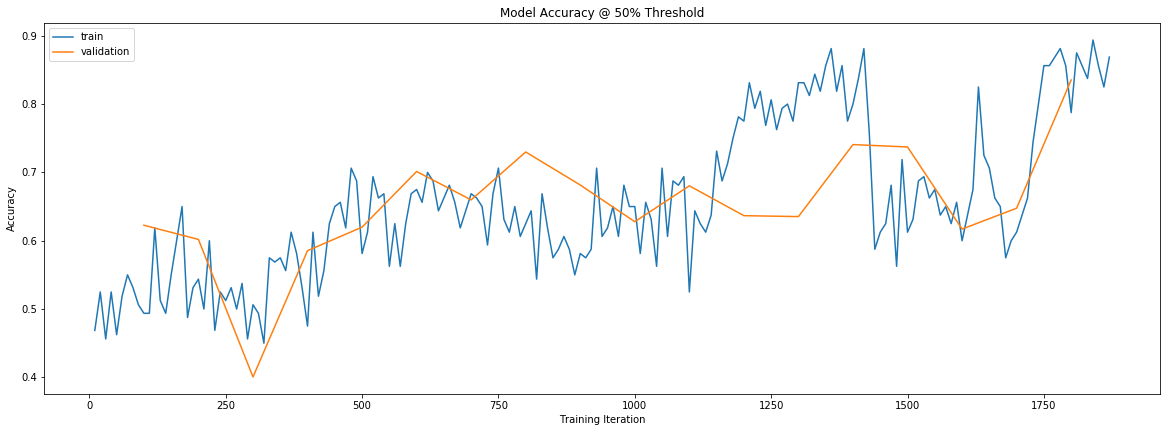

{   '--COLA': False,
    '--IMDB': False,
    '--QNLI': False,
    '--QQP': True,
    '--RTE': False,
    '--attention-dropout': True,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.5',
    '--dset-size': '30000',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '1',
    '--max-sent-len': '512',
    '--n-heads': '12',
    '--n-layers': '12',
    '--n-valid': '6000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Attention-Dropout (Ours)',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '100'}


In [4]:
model_path = 'complete_QQP-AD-12LAYER-{}'.format(ID)
model2, _, _, m2 = load(model_path, cpu=True, load_model=False)
m2['args']['--save-to'] = 'Attention-Dropout (Ours)'
plot_metrics(m2, first_n=None)
pp.pprint(m2['args'])

--------Vanilla Dropout----------
Max (Validation, Train): (0.71, 0.89)
Total Time: 1096.4026 
Train Time: 521.432
--------Attention-Dropout (Ours)----------
Max (Validation, Train): (0.84, 0.89)
Total Time: 1286.7591 
Train Time: 696.5877


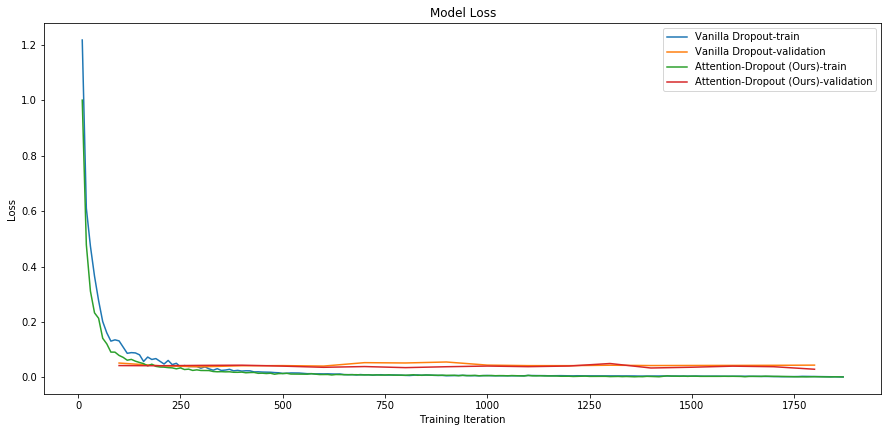

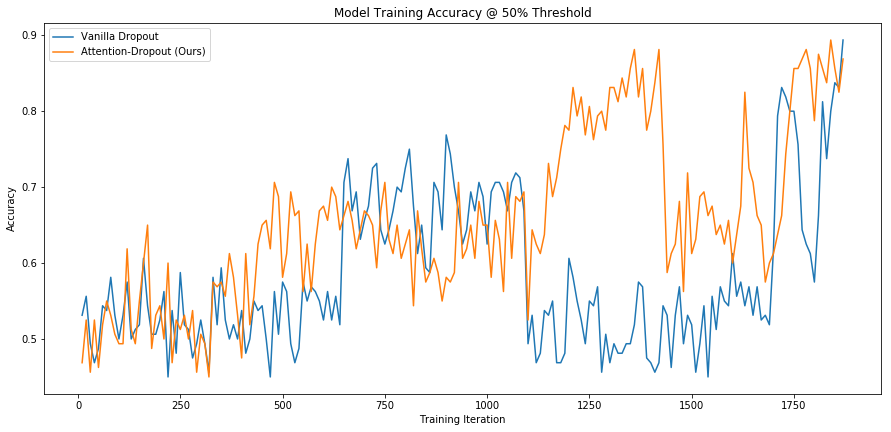

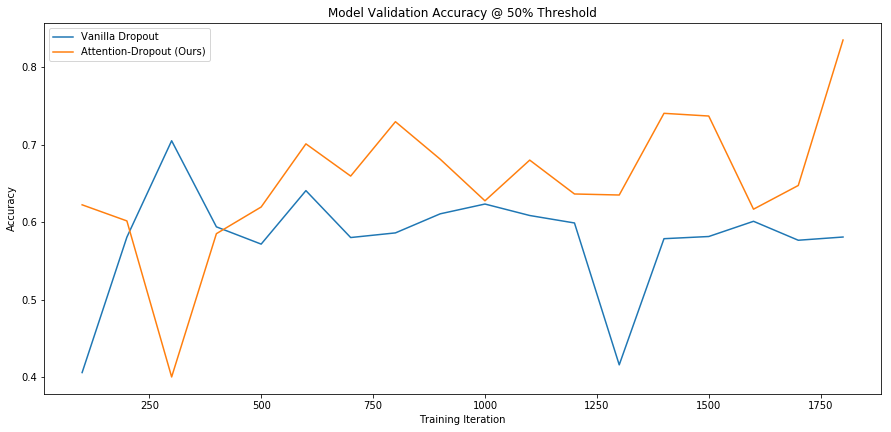

In [5]:
compare_metrics([m1, m2], first_n=None)

# 6Layer

Total Time: 784.869 
Train Time: 277.6945
Max (Validation, Train): (0.73, 0.88)


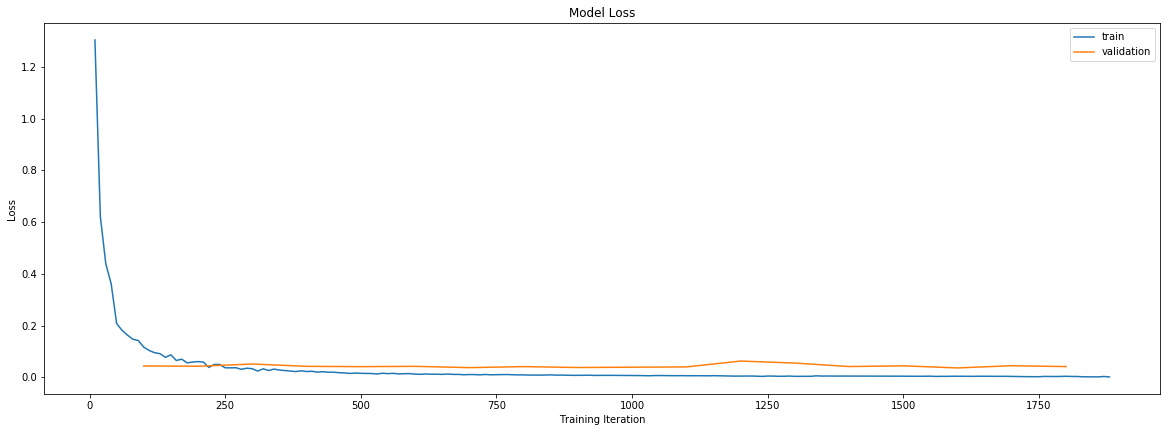

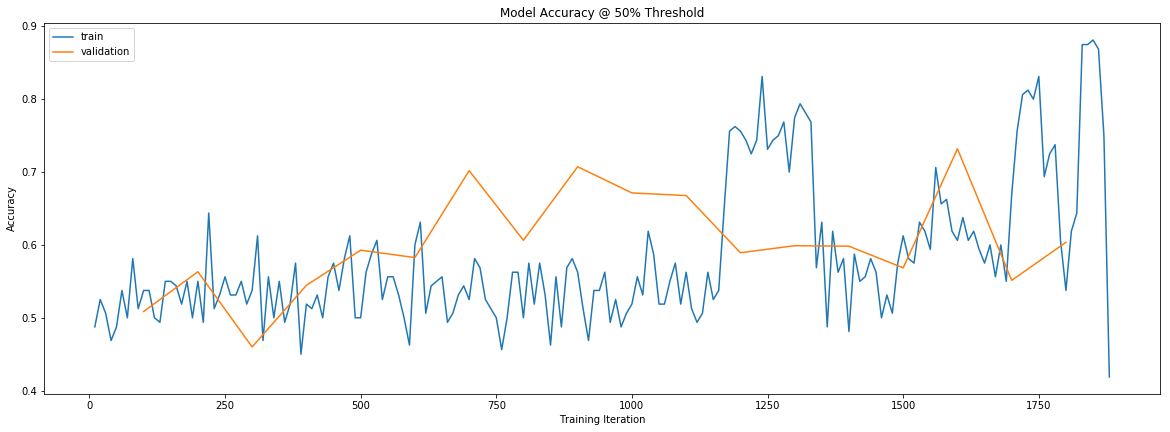

{   '--COLA': False,
    '--IMDB': False,
    '--QNLI': False,
    '--QQP': True,
    '--RTE': False,
    '--attention-dropout': False,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.5',
    '--dset-size': '30000',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '1',
    '--max-sent-len': '512',
    '--n-heads': '6',
    '--n-layers': '6',
    '--n-valid': '6000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Vanilla Dropout',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '100'}


In [8]:
model_path = 'complete_QQP-VD-6LAYER-{}'.format(ID)
model1, _, _, m1 = load(model_path, cpu=True, load_model=False)
m1['args']['--save-to'] = 'Vanilla Dropout'
plot_metrics(m1, first_n=None)
pp.pprint(m1['args'])

Total Time: 853.192 
Train Time: 354.6924
Max (Validation, Train): (0.78, 0.92)


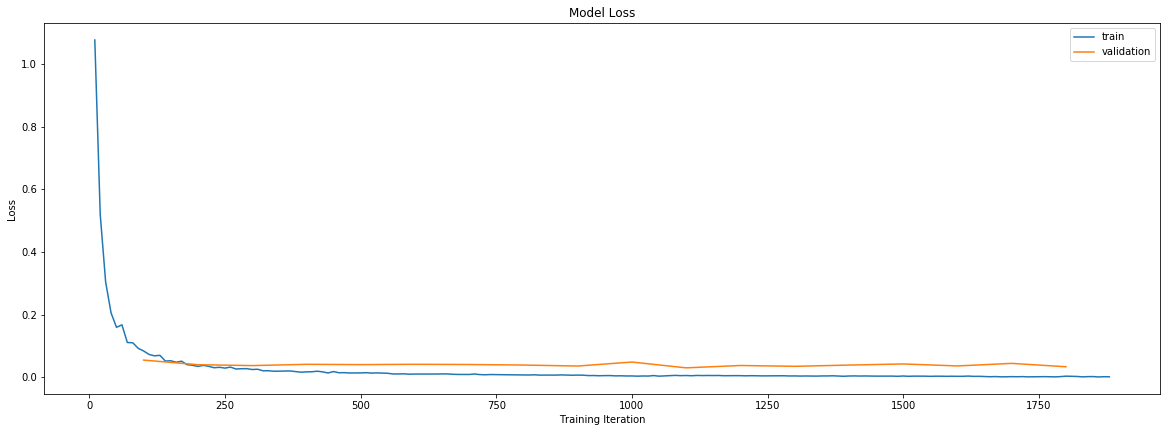

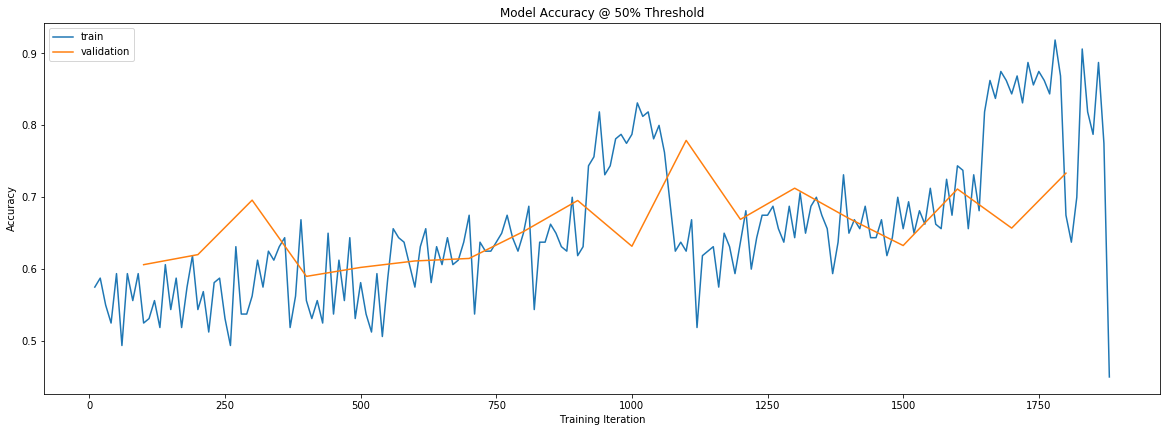

{   '--COLA': False,
    '--IMDB': False,
    '--QNLI': False,
    '--QQP': True,
    '--RTE': False,
    '--attention-dropout': True,
    '--batch-size': '16',
    '--clip-grad': '5.0',
    '--decrease-dropout': '10',
    '--dropout': '0.5',
    '--dset-size': '30000',
    '--help': False,
    '--hidden-size': '384',
    '--load': False,
    '--load-from': 'default-model',
    '--log-every': '10',
    '--lr': '3e-5',
    '--max-epoch': '1',
    '--max-sent-len': '512',
    '--n-heads': '6',
    '--n-layers': '6',
    '--n-valid': '6000',
    '--n-words': '10000',
    '--qtest': False,
    '--save': True,
    '--save-to': 'Attention-Dropout (Ours)',
    '--seed': '0',
    '--start-decrease': '100',
    '--test': False,
    '--validate-every': '100'}


In [9]:
model_path = 'complete_QQP-AD-6LAYER-{}'.format(ID)
model2, _, _, m2 = load(model_path, cpu=True, load_model=False)
m2['args']['--save-to'] = 'Attention-Dropout (Ours)'
plot_metrics(m2, first_n=None)
pp.pprint(m2['args'])

--------Vanilla Dropout----------
Max (Validation, Train): (0.73, 0.88)
Total Time: 784.869 
Train Time: 277.6945
--------Attention-Dropout (Ours)----------
Max (Validation, Train): (0.78, 0.92)
Total Time: 853.192 
Train Time: 354.6924


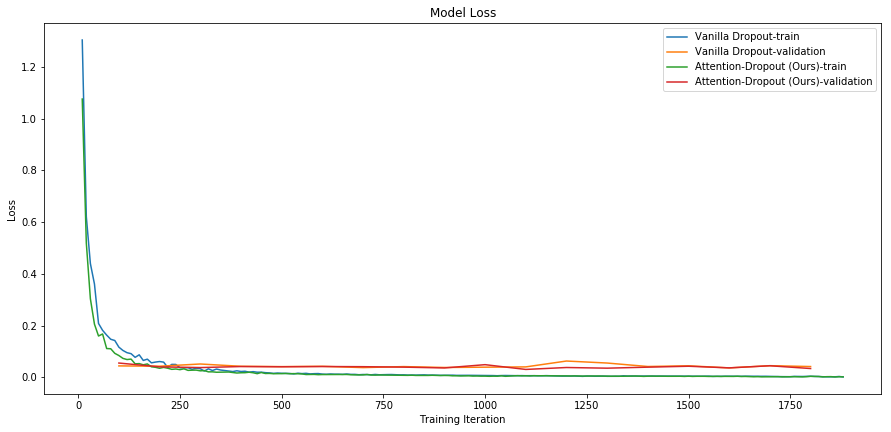

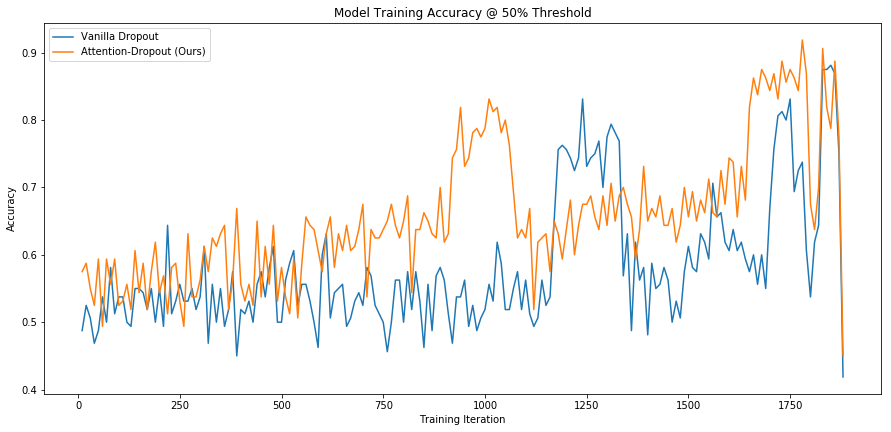

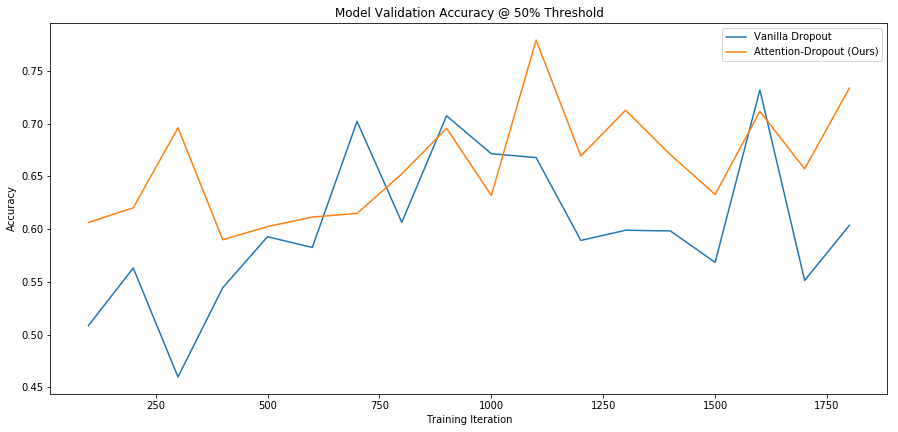

In [10]:
compare_metrics([m1, m2], first_n=None)